In [1]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from scipy import stats
from scipy.stats import norm, skew #for some statistics
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from scipy.special import boxcox1p

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
House_train = pd.read_csv('Htrain.csv')
House_test = pd.read_csv('Htest.csv')

In [3]:
House_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
House_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [5]:
#check the count and features of both the datasets
print('The training dataset size is : {} '.format(House_train.shape))
print('The test dataset size is : {} '.format(House_test.shape))

#save the 'Id' column from both datasets
train_id = House_train['Id']
test_id = House_test['Id']

#drop the 'Id' column 
House_train.drop('Id', axis=1, inplace=True)
House_test.drop('Id', axis=1, inplace=True)

#check the count and features of both the datasets after 'Id' removal
print('The training dataset size after Id removal is : {} '.format(House_train.shape))
print('The test dataset size after Id removal is : {} '.format(House_test.shape))

The training dataset size is : (1460, 81) 
The test dataset size is : (1459, 80) 
The training dataset size after Id removal is : (1460, 80) 
The test dataset size after Id removal is : (1459, 79) 


In [6]:
House_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

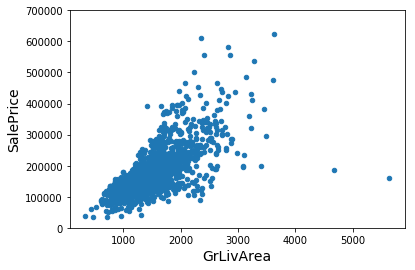

In [7]:
var = 'GrLivArea'
data = pd.concat([House_train['SalePrice'], House_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,700000))
plt.ylabel('SalePrice', fontsize=14)
plt.xlabel('GrLivArea', fontsize=14)
plt.show()

Pre Processing of the Data
SalePrice is our target variable. Let us do some analysis on this variable

In [8]:
House_train = House_train.drop(House_train[(House_train['GrLivArea']>4000) & (House_train['SalePrice']<300000)].index)

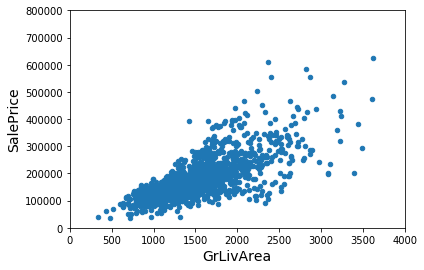

In [9]:
var = 'GrLivArea'
data = pd.concat([House_train['SalePrice'], House_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000), xlim=(0,4000))
plt.ylabel('SalePrice', fontsize=14)
plt.xlabel('GrLivArea', fontsize=14)
plt.show()

There seems to be a linear relationship between SalePrice and GrLivArea. Also, there are two outliers as well, right bottom side, where the GrLivArea greater than 4000, the SalePrice is very low, around 200000. We will remove this.

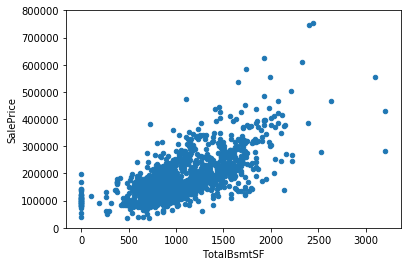

In [10]:
#scatter plot totalbsmtsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([House_train['SalePrice'], House_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

Again the Saleprice & Total BsmtST has has a linear relationship

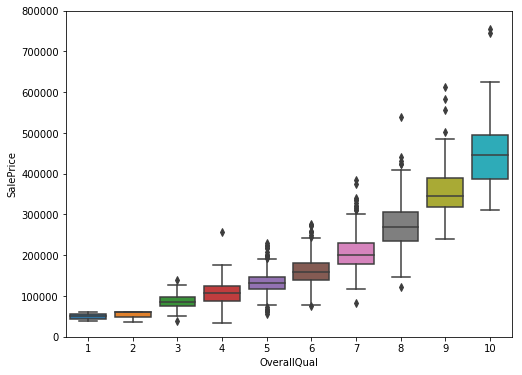

In [11]:
#box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([House_train['SalePrice'], House_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

Sale price is more as the overall Quality increases.

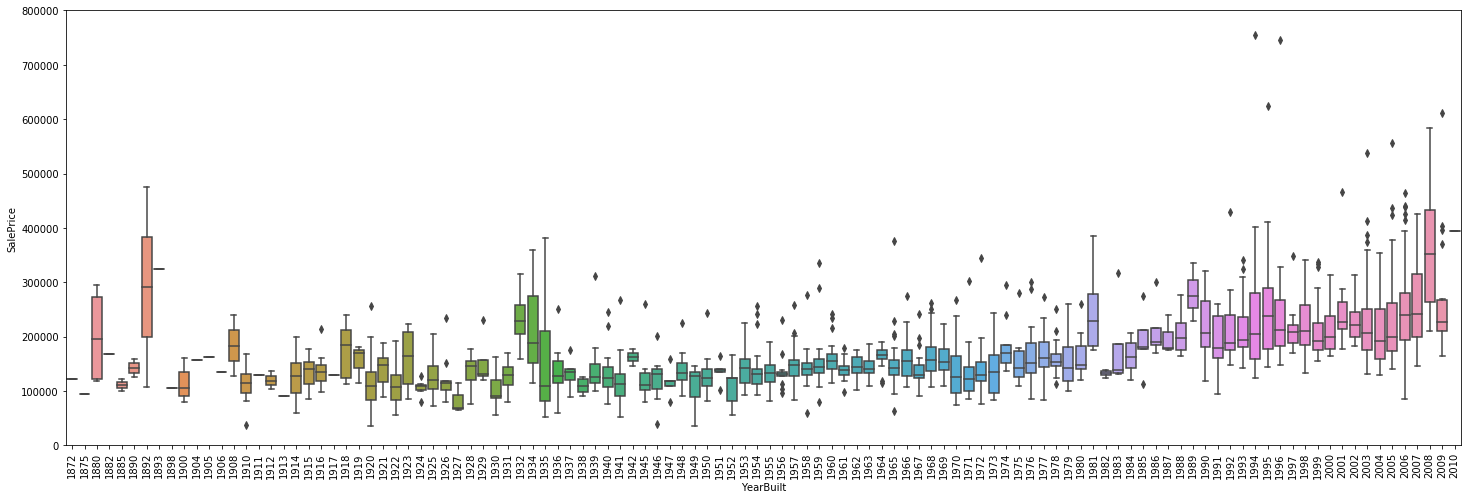

In [12]:
var = 'YearBuilt'
data = pd.concat([House_train['SalePrice'], House_train[var]], axis=1)
f, ax = plt.subplots(figsize=(25, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

In [13]:
#Inference : Newer the house, higher is the price

    SUMMARY : We see that GrLivArea and TotalBsmtSF seem to be linearly related with SalePrice. Both of them have postive effect. When one increases, the SalePrice also increases. TotalBsmtSF seem to have steeper gradient though. 
    OverallQual and Year built are also positively corelated. However, the relationship seems to be stronger between OverallQual and SalePrice


 mu = 180932.92 and sigma = 79467.79



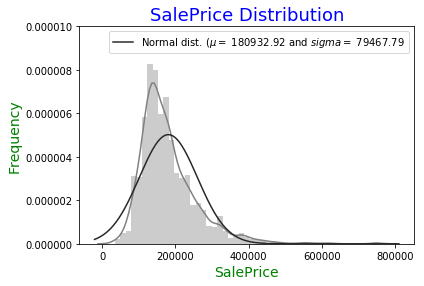

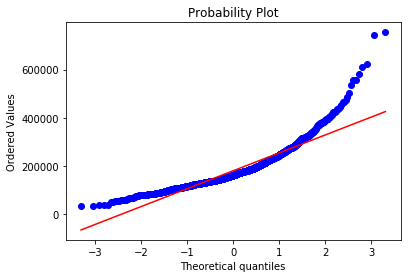

In [14]:
#checking the distribution of the 'SalePrice'
sns.distplot(House_train['SalePrice'], fit=norm, color='grey')

#get the fitted parameters used by this function
(mu, sigma) = norm.fit(House_train['SalePrice'])

print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $sigma=$ {:.2f}'.format(mu,sigma)], fontsize=10)
plt.ylim(0, 0.00001)
plt.title('SalePrice Distribution', fontsize=18, color='blue')
plt.ylabel('Frequency', fontsize=14, color='green')
plt.xlabel('SalePrice', fontsize=14, color='green')
plt.show()

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(House_train['SalePrice'], plot=plt)
plt.show()

'SalePrice' seems to be slight deviation from Normal distribution
Have positive skewness. We need to transform this variable and make it more normally distributed. Lets do log transformation of the 'SalePrice

In [15]:
House_train['SalePrice'] = np.log(House_train['SalePrice'])


 mu = 12.02 and sigma = 0.40



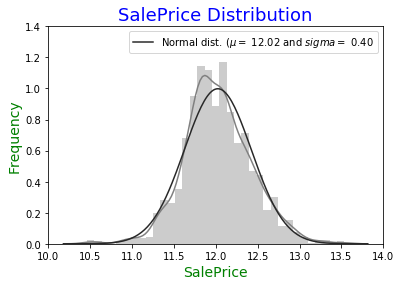

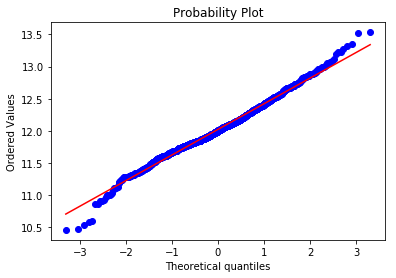

In [16]:
#checking the new distribution of the 'SalePrice'
sns.distplot(House_train['SalePrice'], fit=norm, color='grey')

#get the fitted parameters used by this function
(mu, sigma) = norm.fit(House_train['SalePrice'])

print('\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $sigma=$ {:.2f}'.format(mu,sigma)], fontsize=10)
plt.ylim(0, 1.4)
plt.title('SalePrice Distribution', fontsize=18, color='blue')
plt.ylabel('Frequency', fontsize=14, color='green')
plt.xlabel('SalePrice', fontsize=14, color='green')
plt.show()

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(House_train['SalePrice'], plot=plt)
plt.show()

The skew seems to be now corrected and the data appears more normally distributed.

Concatenation of House_train and House_test data in a single DataFrame

In [17]:
ntrain = House_train.shape[0]
ntest = House_test.shape[0]
print("Rows of train dataset is : {}".format(ntrain))
print("Rows of test dataset is : {}".format(ntest))
y_house_train = House_train.SalePrice.values
Combined_data = pd.concat((House_train, House_test)).reset_index(drop=True)
Combined_data.drop(['SalePrice'], axis=1, inplace=True)
print("Size of Combined_data is : {}".format(Combined_data.shape))

Rows of train dataset is : 1458
Rows of test dataset is : 1459
Size of Combined_data is : (2917, 79)


Finding the Missing Data

In [18]:
(House_train.isnull().sum() / len(House_train)).sort_values(ascending=False)[:25]

PoolQC          0.995885
MiscFeature     0.962963
Alley           0.937586
Fence           0.807270
FireplaceQu     0.473251
LotFrontage     0.177641
GarageType      0.055556
GarageCond      0.055556
GarageFinish    0.055556
GarageQual      0.055556
GarageYrBlt     0.055556
BsmtFinType2    0.026063
BsmtExposure    0.026063
BsmtQual        0.025377
BsmtCond        0.025377
BsmtFinType1    0.025377
MasVnrArea      0.005487
MasVnrType      0.005487
Electrical      0.000686
RoofMatl        0.000000
Exterior1st     0.000000
RoofStyle       0.000000
ExterQual       0.000000
Exterior2nd     0.000000
YearBuilt       0.000000
dtype: float64

In [19]:
Combined_data_na = Combined_data.isnull().sum() * 100 / len(Combined_data)
Combined_data_na = Combined_data_na.drop(Combined_data_na[Combined_data_na == 0].index).sort_values(ascending=False)[:30]
Data_Missing = pd.DataFrame({'Missing_Ratio': Combined_data_na})
Data_Missing.head(25)

,Missing_Ratio
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageQual,5.450806
GarageCond,5.450806
GarageFinish,5.450806
GarageYrBlt,5.450806


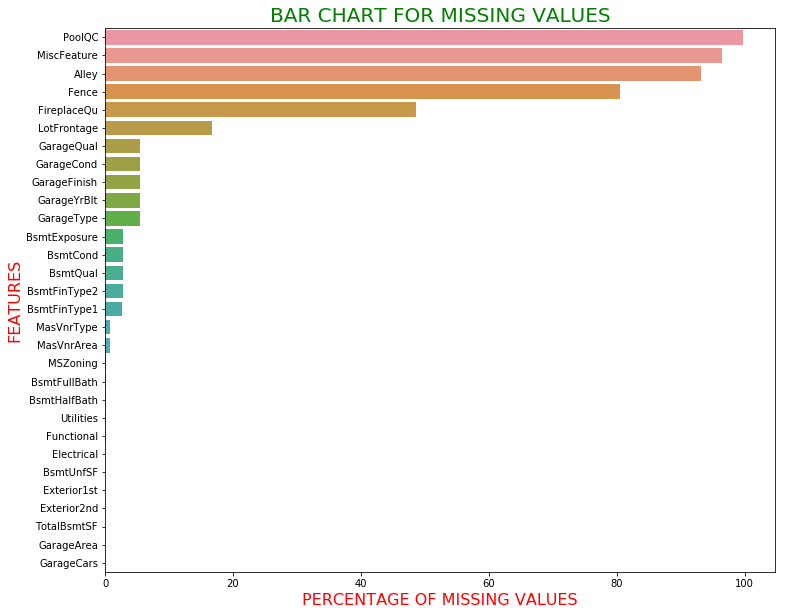

In [20]:
#create a bar chart for the missing values
f, ax = plt.subplots(figsize=(12, 10))
sns.barplot(y=Combined_data_na.index, x=Combined_data_na)
plt.ylabel('FEATURES', fontsize=16, color='red')
plt.xlabel('PERCENTAGE OF MISSING VALUES', fontsize=16, color='red')
plt.title('BAR CHART FOR MISSING VALUES', fontsize=20, color='green')
plt.show()

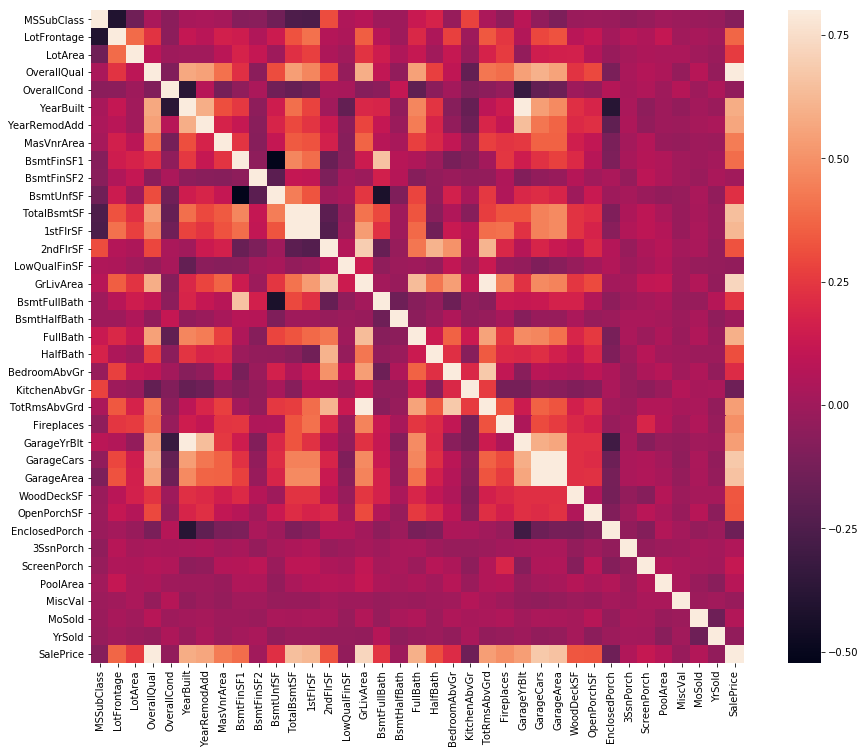

In [21]:
#correlation matrix
corrmat = House_train.corr()
f, ax = plt.subplots(figsize=(16, 12))
sns.heatmap(corrmat, vmax=0.8, square=True);

'SalePrice' correlations. We can see our well-known 'GrLivArea', 'TotalBsmtSF', and 'OverallQual' have significant positive effect on SalePrice

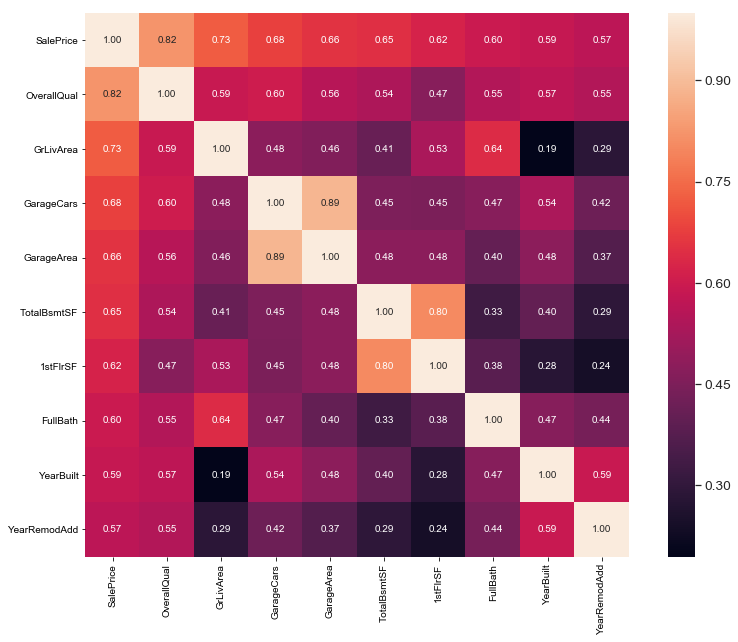

In [22]:
#saleprice correlation matrix
f, ax = plt.subplots(figsize=(14, 10))
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(House_train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

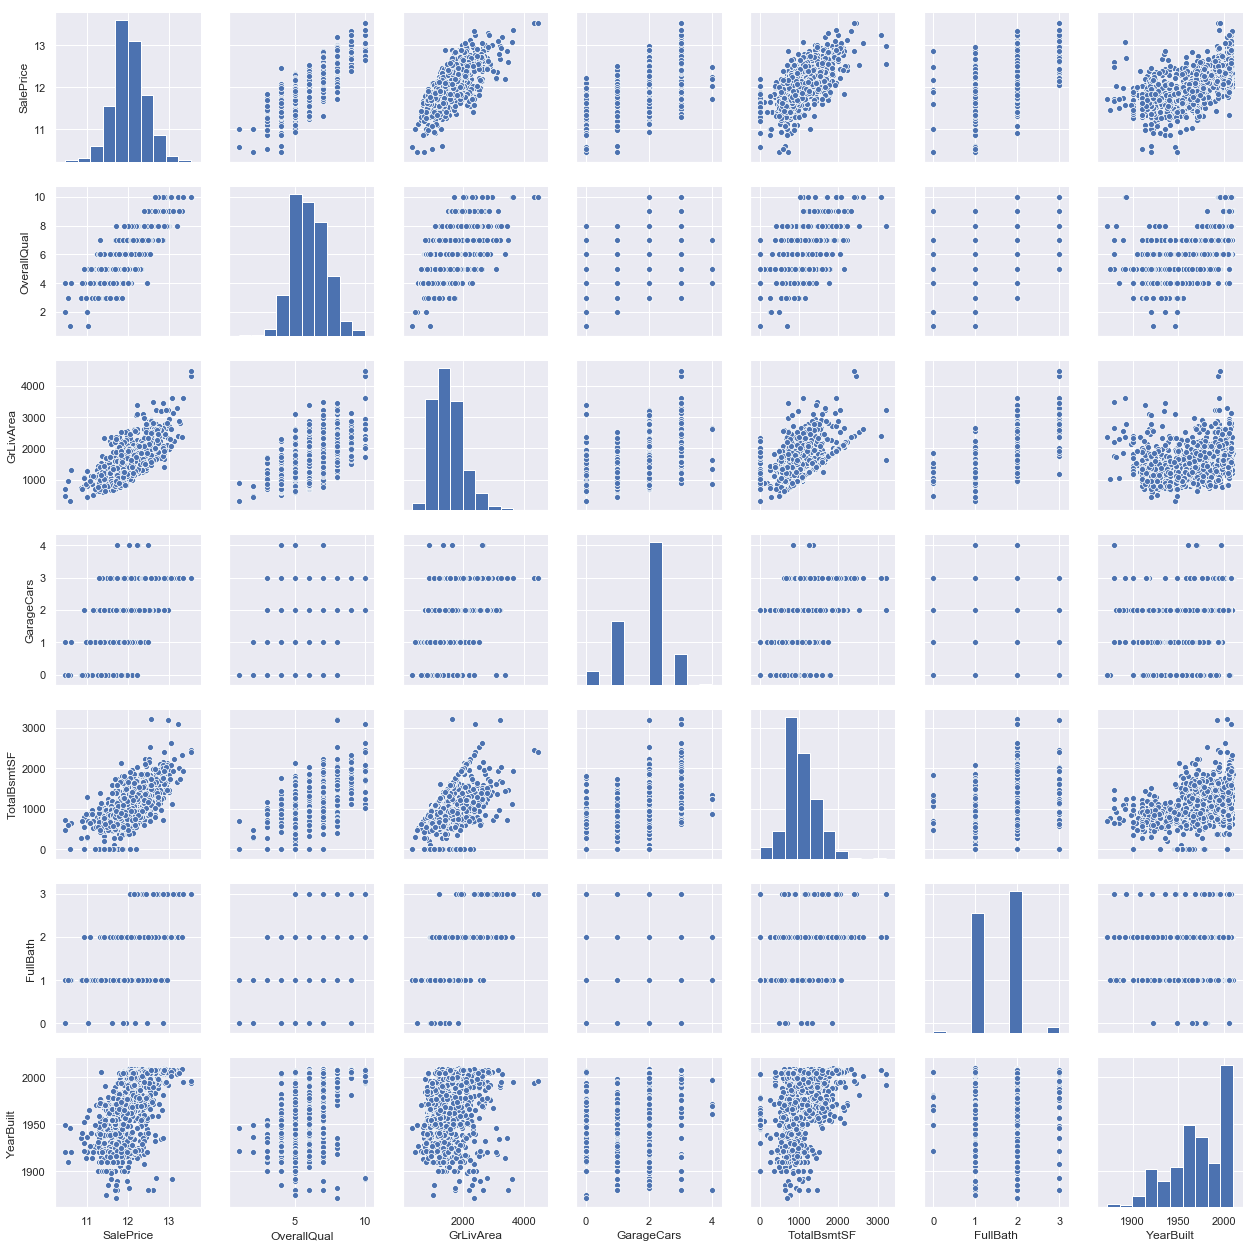

In [23]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(House_train[cols], size = 2.5)
plt.show();

Lets evaluate every variable which have missing values and deal with them individually

The PoolQC - Pool quanlity has values 'NA' which means there is no pool as per Data Description file.

In [24]:
Combined_data["PoolQC"] = Combined_data["PoolQC"].fillna("None")

As per Data Decription, for MiscFeatures -- the meaning of NA is none

In [25]:
Combined_data["MiscFeature"] = Combined_data["MiscFeature"].fillna("None")

As per Data Decription, for FireplaceQu -- the meaning of NA is none

In [26]:
Combined_data["FireplaceQu"] = Combined_data["FireplaceQu"].fillna("None")

As per Data Decription, for Alley -- the meaning of NA is none

In [27]:
Combined_data["Alley"] = Combined_data["Alley"].fillna("None")

As per Data Decription, for Fence -- the meaning of NA is none

In [28]:
Combined_data["Fence"] = Combined_data["Fence"].fillna("None")

As per Data Decription, for GarageType -- the meaning of NA is none

In [29]:
Combined_data["GarageType"] = Combined_data["GarageType"].fillna("None")

As per Data Decription, for GarageFinish -- the meaning of NA is none

In [30]:
Combined_data["GarageType"] = Combined_data["GarageType"].fillna("None")

As per Data Decription, for GarageQual -- the meaning of NA is none

In [31]:
Combined_data["GarageQual"] = Combined_data["GarageQual"].fillna("None")

As per Data Decription, for GarageFinish -- the meaning of NA is none

In [32]:
Combined_data["GarageFinish"] = Combined_data["GarageFinish"].fillna("None")

 As per Data Description, for GarageCond - replacing NA with none

In [33]:
Combined_data["GarageCond"] = Combined_data["GarageCond"].fillna("None")

As per Data Decription, for BsmtQual -- the meaning of NA is none

In [34]:
Combined_data["BsmtQual"] = Combined_data["BsmtQual"].fillna("None")

As per Data Decription, for BsmtCond -- the meaning of NA is none

In [35]:
Combined_data["BsmtCond"] = Combined_data["BsmtCond"].fillna("None")

As per Data Decription, for BsmtExposure -- the meaning of NA is none

In [36]:
Combined_data["BsmtExposure"] = Combined_data["BsmtExposure"].fillna("None")

As per Data Decription, for BsmtFinType1 -- the meaning of NA is none

In [37]:
Combined_data["BsmtFinType1"] = Combined_data["BsmtFinType1"].fillna("None")

As per Data Decription, for BsmtFinType2 -- the meaning of NA is none

In [38]:
Combined_data["BsmtFinType2"] = Combined_data["BsmtFinType2"].fillna("None")

As per Data Decription, for GarageYrBlt, GarageArea and GarageCars -- if the value is missing, it is replaced 
with zero

In [39]:
for i in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    Combined_data[i] = Combined_data[i].fillna(0)

As per Data Decription, for BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath and BsmtHalfBath
if the value is missing, it is likely to be zero for not having any basement

In [40]:
for i in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    Combined_data[i] = Combined_data[i].fillna(0)

As per Data Decription, for MasVnrType -- the meaning of NA is none

In [41]:
Combined_data["MasVnrType"] = Combined_data["MasVnrType"].fillna("None")

As per Data Decription, for MasVnrArea -- if the data is missing, it is likely to be zero

In [42]:
Combined_data["MasVnrArea"] = Combined_data["MasVnrArea"].fillna(0)

In [43]:
Combined_data.MSZoning.value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [44]:
Combined_data.MSZoning.isnull().sum()

4

As seen above, we have fill missing values in MSZoning with RL, the highest occurance in this column

In [45]:
Combined_data["MSZoning"] = Combined_data["MSZoning"].fillna(Combined_data.MSZoning.mode()[0])

In [46]:
Combined_data.Utilities.value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

Since only one property where the utility is NoSeWa, we can safely drop the utilities feature

In [47]:
Combined_data = Combined_data.drop(["Utilities"], axis=1)

As per Data Decription, for Functional -- The default is Typical Functionality (Typ)

In [48]:
Combined_data["Functional"] = Combined_data["Functional"].fillna("Typ")

In [49]:
Combined_data.Electrical.isnull().sum()

1

For Electrical, we can see there is one null value, will fill this up with value that occurs most

In [50]:
Combined_data.Electrical.value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [51]:
Combined_data["Electrical"] = Combined_data["Electrical"].fillna("SBrkr")

In [52]:
Combined_data.KitchenQual.isnull().sum()

1

For KitchenQual, we can see there is one null value, will fill this up with value that occurs most

In [53]:
Combined_data.KitchenQual.value_counts()

TA    1492
Gd    1151
Ex     203
Fa      70
Name: KitchenQual, dtype: int64

In [54]:
Combined_data["KitchenQual"] = Combined_data["KitchenQual"].fillna(Combined_data.KitchenQual.mode()[0])

In [55]:
print(Combined_data.Exterior1st.isnull().sum())
print(Combined_data.Exterior2nd.isnull().sum())

1
1


Both Exterior1st and Exterior2nd has one missing value. Hence update will the most occuring value

In [56]:
Combined_data["Exterior1st"] = Combined_data["Exterior1st"].fillna(Combined_data.Exterior1st.mode()[0])
Combined_data["Exterior2nd"] = Combined_data["Exterior2nd"].fillna(Combined_data.Exterior2nd.mode()[0])

In [57]:
Combined_data.SaleType.isnull().sum()

1

In [58]:
Combined_data["SaleType"] = Combined_data["SaleType"].fillna(Combined_data.SaleType.mode()[0])

Check if any other missing value in any feature column

In [59]:
Combined_data.LotFrontage.isnull().sum()

486

LotFrontage : Linear feet of the street in front of the house.
Since each street in the neigborhood will be same, we will fill the median LotFrontage of the neighbour in the missing values.

In [60]:
Combined_data["LotFrontage"] = Combined_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [61]:
Combined_data_na = Combined_data.isnull().sum() * 100 / len(Combined_data)
Combined_data_na = Combined_data_na.drop(Combined_data_na[Combined_data_na == 0].index).sort_values(ascending=False)[:30]
Data_Missing = pd.DataFrame({'Missing_Ratio': Combined_data_na})
Data_Missing.head(25)

,Missing_Ratio


In [62]:
Combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 78 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            2917 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2917 non-null object
BsmtExposure     2917 non-null object
BsmtFinSF1       2917 non-null float64
BsmtFinSF2       2917 non-null float64
BsmtFinType1     2917 non-null object
BsmtFinType2     2917 non-null object
BsmtFullBath     2917 non-null float64
BsmtHalfBath     2917 non-null float64
BsmtQual         2917 non-null object
BsmtUnfSF        2917 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2917 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      29

Converting some of the numerical variable into categorical variables

In [63]:
Combined_data['YrSold'] = Combined_data['YrSold'].astype(str)
Combined_data['MoSold'] = Combined_data['MoSold'].astype(str)
Combined_data['OverallCond'] = Combined_data['OverallCond'].astype(str)
Combined_data['OverallQual'] = Combined_data['OverallQual'].astype(str)                                                         

Using Labelencoder on categorical variables so that 

In [64]:
obj_df = Combined_data.select_dtypes(include=['object']).copy()
obj_df.head()

,Alley,BldgType,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtQual,CentralAir,Condition1,Condition2,...,OverallCond,OverallQual,PavedDrive,PoolQC,RoofMatl,RoofStyle,SaleCondition,SaleType,Street,YrSold
0,None,1Fam,TA,No,GLQ,Unf,Gd,Y,Norm,Norm,...,5,7,Y,None,CompShg,Gable,Normal,WD,Pave,2008
1,None,1Fam,TA,Gd,ALQ,Unf,Gd,Y,Feedr,Norm,...,8,6,Y,None,CompShg,Gable,Normal,WD,Pave,2007
2,None,1Fam,TA,Mn,GLQ,Unf,Gd,Y,Norm,Norm,...,5,7,Y,None,CompShg,Gable,Normal,WD,Pave,2008
3,None,1Fam,Gd,No,ALQ,Unf,TA,Y,Norm,Norm,...,5,7,Y,None,CompShg,Gable,Abnorml,WD,Pave,2006
4,None,1Fam,TA,Av,GLQ,Unf,Gd,Y,Norm,Norm,...,5,8,Y,None,CompShg,Gable,Normal,WD,Pave,2008


In [65]:
obj_df.columns

Index(['Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold',
       'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'YrSold'],
      dtype='object')

Label Encoding for some of the categorical variables.

In [66]:
colms = ('Alley', 'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'BsmtQual', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'ExterCond', 'ExterQual', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Foundation', 'Functional', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'Heating', 'HeatingQC',
       'HouseStyle', 'KitchenQual', 'LandContour', 'LandSlope', 'LotConfig',
       'LotShape', 'MSZoning', 'MasVnrType', 'MiscFeature', 'MoSold',
       'Neighborhood', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolQC',
       'RoofMatl', 'RoofStyle', 'SaleCondition', 'SaleType', 'Street',
       'YrSold')

#Apply LabelEncoder on the columns as given above

for i in colms:
    lbl = LabelEncoder()
    lbl.fit(list(Combined_data[i].values))
    Combined_data[i] = lbl.transform(list(Combined_data[i].values))
    
Combined_data.shape

(2917, 78)

Since Total Area is an important feature, we add all the area of a house to get the Total Area

In [67]:
# Adding total sqfootage feature 
Combined_data['TotalSF'] = Combined_data['TotalBsmtSF'] + Combined_data['1stFlrSF'] + Combined_data['2ndFlrSF']

In [68]:
train = Combined_data[:ntrain]
#Since GarageArea and GarageCars were +vely co-related, hence dropping GarageArea
train.drop(['GarageArea'], axis=1, inplace=True)
train.columns

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageCars', 'GarageCond', 'GarageFinish',
       'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea', 'HalfBath',
       'Heating', 'HeatingQC', 'HouseStyle', 'KitchenAbvGr', 'KitchenQual',
       'LandContour', 'LandSlope', 'LotArea', 'LotConfig', 'LotFrontage',
       'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning', 'MasVnrArea',
       'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold', 'Neighborhood',
       'OpenPorchSF', 'OverallCond', 'OverallQual', 'PavedDrive', 'PoolArea',
       'PoolQC', 'RoofMatl', '

In [69]:
test = Combined_data[ntrain:]
# Since GarageArea and GarageCars were +vely co-related, hence dropping GarageArea
test.drop(['GarageArea'], axis=1, inplace=True)
test.shape

(1459, 78)

Linear Regression

In [70]:
regressor = LinearRegression()
regressor.fit(train, y_house_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
coeff_df = pd.DataFrame(regressor.coef_, train.columns, columns=['Coefficent']).sort_values(by='Coefficent', ascending=False)
coeff_df.head(25)

,Coefficent
Street,0.221493
PoolQC,0.094641
CentralAir,0.079950
OverallCond,0.046029
GarageCars,0.043885
Fireplaces,0.030177
Alley,0.027356
BsmtFullBath,0.027308
FullBath,0.025752
OverallQual,0.025374


In [72]:
y_pred = regressor.predict(test)

In [73]:
y_pred = np.around(np.exp(y_pred), decimals=2)

In [74]:
y_pred = list(y_pred)

In [75]:
df = pd.DataFrame(test_id, columns =['Id']) 

In [76]:
df['SalePrice'] = y_pred

In [77]:
df.head()

,Id,SalePrice
0,1461,118892.13
1,1462,155157.25
2,1463,179991.45
3,1464,194951.61
4,1465,173767.92


In [78]:
df.to_csv('C:\Sumit\scripts\Capstone - House_Price_Prediction\H_Price_Pred_LR.csv', index=False)

SKEWED FEATURES:--

In [79]:
num_features = Combined_data.dtypes[Combined_data.dtypes != 'Object'].index

#check the skew of all numeric features

skewed_features = Combined_data[num_features].apply(lambda x: skew(x)).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skew' :skewed_features})
skewness_df.head(30)

,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
Condition2,12.340989
LowQualFinSF,12.084539
Heating,12.074570
3SsnPorch,11.372080
RoofMatl,8.722755
MiscFeature,5.062388
LandSlope,4.973254


Box Cox Transformation of (highly) skewed features

In [80]:
skewness_df = skewness_df[abs(skewness_df > 0.8)]

print(skewness_df.shape[0])

Skewed_Features = skewness_df.index

lam = 0.15
for i in Skewed_Features:
    Combined_data[i] = boxcox1p(Combined_data[i], lam)


79


In [81]:
train = Combined_data[:ntrain]
train.shape

(1458, 79)

In [82]:
test = Combined_data[ntrain:]
test.shape

(1459, 79)

Linear Regresion

In [83]:
regressor = LinearRegression()
regressor.fit(train, y_house_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [84]:
coeff_df = pd.DataFrame(regressor.coef_, train.columns, columns=['Coefficent']).sort_values(by='Coefficent', ascending=False)
coeff_df.head(25)

,Coefficent
YearBuilt,1.212562
YearRemodAdd,0.540108
Street,0.303987
OverallCond,0.202702
TotalSF,0.150774
GarageCars,0.086498
Functional,0.080897
CentralAir,0.079001
FullBath,0.068101
Alley,0.065893


In [85]:
y_pred = regressor.predict(test)

In [86]:
y_pred_new = np.around(np.exp(y_pred), decimals=2)

In [87]:
y_pred_new = list(y_pred_new)

In [88]:
df = pd.DataFrame(test_id, columns =['Id']) 

In [89]:
df['SalePrice'] = y_pred_new

In [90]:
df.to_csv('C:\Sumit\scripts\Capstone - House_Price_Prediction\H_Price_Pred_LR_SR.csv', index=False)

linear regression train score: 0.9150246677902425
ridge regression train score low alpha: 0.9150233637325653
ridge regression train score high alpha: 0.8934029489335512


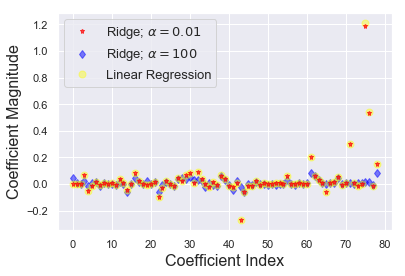

In [91]:
rr = Ridge(alpha=0.01) 
rr.fit(train, y_house_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(train, y_house_train)

Lr = LinearRegression()
Lr.fit(train, y_house_train)
train_score=Lr.score(train, y_house_train)

Ridge_train_score = rr.score(train, y_house_train)

Ridge_train_score100 = rr100.score(train, y_house_train)

print("linear regression train score:", train_score)

print("ridge regression train score low alpha:", Ridge_train_score)

print("ridge regression train score high alpha:", Ridge_train_score100)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(Lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='yellow',
         label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)
plt.show()

From the above, the Linear Regression is same as that with Ridge(alpha=0.01)

training score: 0.0
number of features used:  0
training score for alpha=0.01: 0.8515972375791803
number of features used: for alpha =0.01: 27
training score for alpha=0.0001: 0.9147003372204563
number of features used: for alpha =0.0001: 74
LR training score: 0.9150246677902425


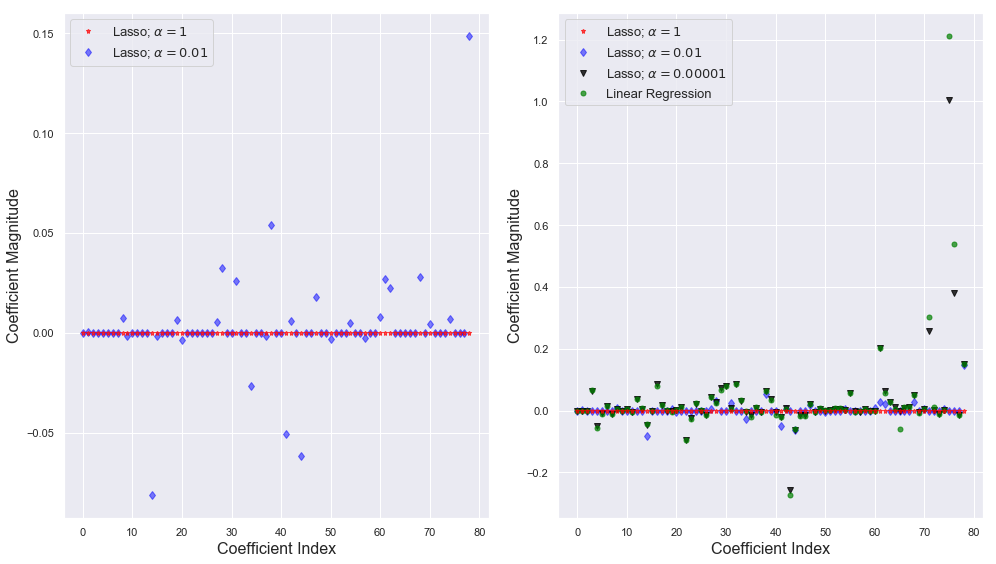

In [92]:
lasso = Lasso()
lasso.fit(train, y_house_train)

train_score=lasso.score(train, y_house_train)

coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(train, y_house_train)

train_score001=lasso001.score(train, y_house_train)

coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001) 
print("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(train, y_house_train)

train_score00001=lasso00001.score(train, y_house_train)

coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(train, y_house_train)
lr_train_score=lr.score(train, y_house_train)

print("LR training score:", lr_train_score)

f, ax = plt.subplots(figsize=(14, 8))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)

plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',
         label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',
         label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)
plt.tight_layout()
plt.show()

The Linear Regression is same as Lasso(alpha=0.00001) where it uses maximum number of features

CALCULATE LINEAR REGRESSION BY SPLITTING THE TRAINING DATA

In [93]:
X1_train, X1_test, y1_train, y1_test=train_test_split(train, y_house_train, test_size=0.3, random_state=3)

In [94]:
print(len(X1_test))
print(len(y1_test))

438
438


CALCULATE LINEAR REGRESSION BY  SPLITTING THE TRAINING DATA

In [95]:
Lr=LinearRegression()
Lr.fit(X1_train, y1_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [96]:
coeff_df = pd.DataFrame(regressor.coef_, X1_train.columns, columns=['Coefficent']).sort_values(by='Coefficent', ascending=False)
coeff_df.head(25)

,Coefficent
YearBuilt,1.212562
YearRemodAdd,0.540108
Street,0.303987
OverallCond,0.202702
TotalSF,0.150774
GarageCars,0.086498
Functional,0.080897
CentralAir,0.079001
FullBath,0.068101
Alley,0.065893


In [97]:
y1_pred = Lr.predict(X1_test)

In [98]:
y1_pred_new = np.around(np.exp(y1_pred), decimals=2)
y1_test_new = np.around(np.exp(y1_test), decimals=2)

In [99]:
df1=pd.DataFrame({'Actual': y1_test_new, 'Predicted': y1_pred_new})

In [100]:
df2=df1.head(30)

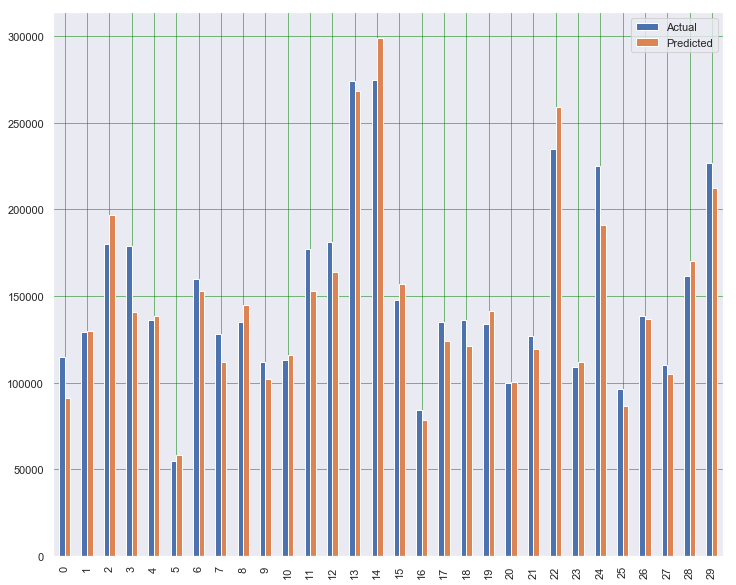

In [101]:
df2.plot(kind='bar',figsize=(12,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))
print('Mean of test data:', np.mean(y1_test))

Mean Absolute Error: 0.09352179469662308
Mean Squared Error: 0.01883643720857909
Root Mean Squared Error: 0.13724590051647842
Mean of test data: 12.021925526880544


linear regression train score: 0.9230083042703181
linear regression test score: 0.8766394400910257
ridge regression train score low alpha: 0.9230051301137732
ridge regression test score low alpha: 0.8767016542107389
ridge regression train score high alpha: 0.894951904861752
ridge regression test score high alpha: 0.8625025007889198


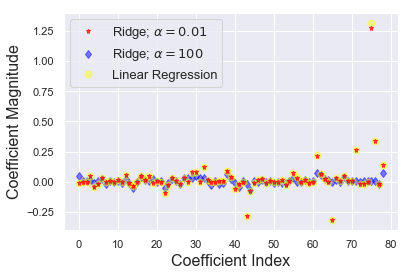

In [103]:
rr = Ridge(alpha=0.01) 
rr.fit(X1_train, y1_train)

rr100 = Ridge(alpha=100) #  comparison with alpha value
rr100.fit(X1_train, y1_train)

train_score=Lr.score(X1_train, y1_train)
test_score=Lr.score(X1_test, y1_test)

Ridge_train_score = rr.score(X1_train,y1_train)
Ridge_test_score = rr.score(X1_test, y1_test)

Ridge_train_score100 = rr100.score(X1_train,y1_train)
Ridge_test_score100 = rr100.score(X1_test, y1_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

print("ridge regression train score low alpha:", Ridge_train_score)
print("ridge regression test score low alpha:", Ridge_test_score)

print("ridge regression train score high alpha:", Ridge_train_score100)
print("ridge regression test score high alpha:", Ridge_test_score100)

plt.plot(rr.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Ridge; $\alpha = 0.01$',zorder=7) # zorder for ordering the markers
plt.plot(rr100.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Ridge; $\alpha = 100$') # alpha here is for transparency
plt.plot(Lr.coef_,alpha=0.4,linestyle='none',marker='o',markersize=7,color='yellow',
         label='Linear Regression')
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)
plt.show()

From the above, the Linear Regression is same as that with Ridge(alpha=0.01)

training score: 0.0
test score:  -5.806664366714287e-05
number of features used:  0
training score for alpha=0.01: 0.8573450047260187
test score for alpha =0.01:  0.8281452480682203
number of features used: for alpha =0.01: 26
training score for alpha=0.0001: 0.9225992162375101
test score for alpha =0.0001:  0.878360897118392
number of features used: for alpha =0.0001: 75
LR training score: 0.9230083042703181
LR test score:  0.8766394400910257


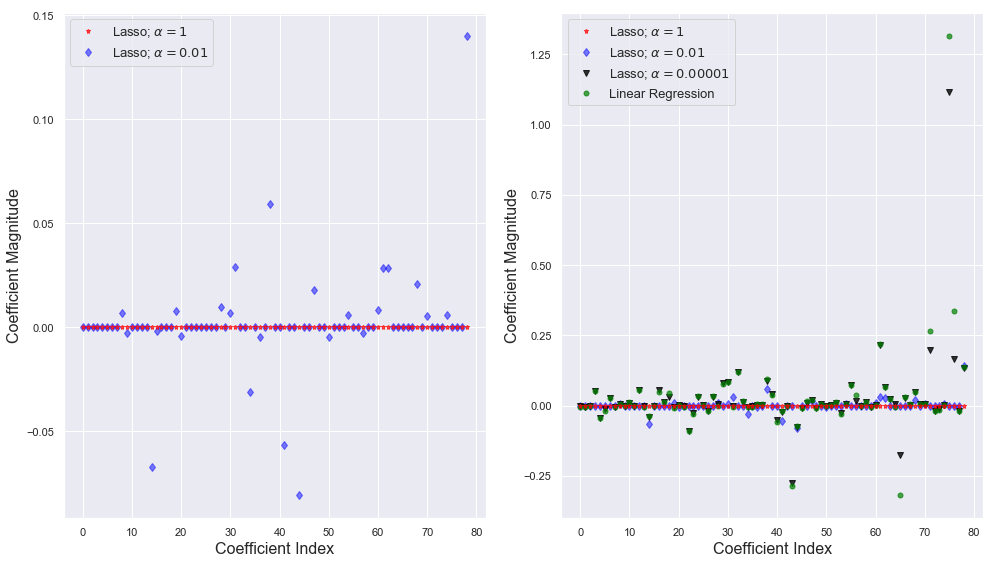

In [104]:
lasso = Lasso()
lasso.fit(X1_train,y1_train)

train_score=lasso.score(X1_train,y1_train)
test_score=lasso.score(X1_test,y1_test)

coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score) 
print("test score: ", test_score)
print("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=10e5)
lasso001.fit(X1_train,y1_train)

train_score001=lasso001.score(X1_train,y1_train)
test_score001=lasso001.score(X1_test,y1_test)

coeff_used001 = np.sum(lasso001.coef_!=0)

print("training score for alpha=0.01:", train_score001) 
print("test score for alpha =0.01: ", test_score001)
print("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=10e5)
lasso00001.fit(X1_train,y1_train)

train_score00001=lasso00001.score(X1_train,y1_train)
test_score00001=lasso00001.score(X1_test,y1_test)

coeff_used00001 = np.sum(lasso00001.coef_!=0)

print("training score for alpha=0.0001:", train_score00001)
print("test score for alpha =0.0001: ", test_score00001)
print("number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X1_train,y1_train)
lr_train_score=lr.score(X1_train,y1_train)
lr_test_score=lr.score(X1_test,y1_test)
print("LR training score:", lr_train_score)
print("LR test score: ", lr_test_score)

f, ax = plt.subplots(figsize=(14, 8))
plt.subplot(1,2,1)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)

plt.subplot(1,2,2)
plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',
         label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',
         label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',
         label=r'Lasso; $\alpha = 0.00001$') # alpha here is for transparency
plt.plot(lr.coef_,alpha=0.7,linestyle='none',marker='o',markersize=5,color='green',
         label='Linear Regression',zorder=2)
plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=0)
plt.tight_layout()
plt.show()

The Linear Regression is same as Lasso(alpha=0.00001) where it uses maximum number of features